In [1]:
# Import basic libraries 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from string import ascii_uppercase
from pandas import DataFrame
import matplotlib.pyplot as plt        
%matplotlib inline

import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import os

#import classification modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# Selection
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#import decision tree plotting libraries
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
# Loading Dataset
missing=["na","--",".",".."]
td= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BIA/Dataset/Hepatities/hepatitis.csv",na_values=missing)
td.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [4]:
td.isnull().sum() # Checking for nulls


class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [5]:
td["class"].replace((1,2),(0,1),inplace=True)


In [6]:
td["class"]=td["class"].astype("bool")


In [7]:
td.describe()


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662
std,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000
50%,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000
75%,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000
max,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [8]:
# Discretization of Age Column
td["age"]=np.where((td["age"]>10) & (td["age"]<20),"Teenagers",
                   np.where((td["age"]>=20) & (td["age"]<=30),"Adults",
                   np.where((td["age"]>30) & (td["age"]<=40),"Middle Aged",np.where((td["age"]<=10),"Children",
                            "Old"))))

In [9]:
td["age"]=pd.Categorical(td.age,["Children",'Teenagers','Adults', 'Middle Aged', 'Old'],ordered=True)

In [10]:
td["age"].value_counts()

Old            65
Middle Aged    46
Adults         30
Children        1
Teenagers       0
Name: age, dtype: int64

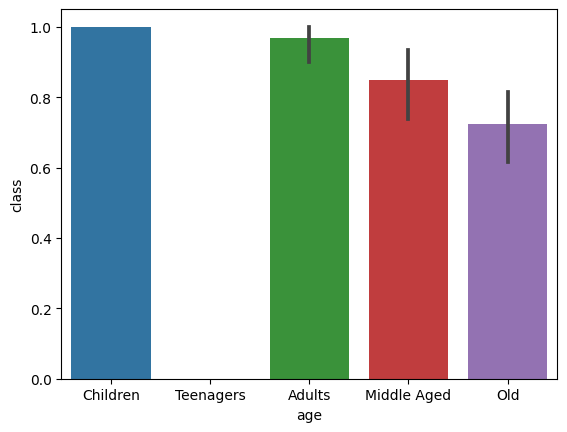

In [11]:
#draw a bar plot of Age vs. survival
sns.barplot(x="age", y="class", data=td)
plt.show()

In [12]:
td["sex"].replace((1,2),("Male","Female"),inplace=True)
td["sex"]=pd.Categorical(td.sex,["Male",'Female'],ordered=False)
td.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,True,Adults,Female,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,True,Old,Male,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,True,Old,Male,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,True,Middle Aged,Male,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,True,Middle Aged,Male,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [13]:
td.dropna(inplace=True) # Now dropping all nulls

In [14]:
td.dtypes

class                 bool
age               category
sex               category
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palable       int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [15]:
#We have categorical variables .getdummies seperates the different categories of categorical variables as separate 
#binary columns
td1 = pd.get_dummies(td,drop_first=True)
#List of new columns
print(td1.columns)
td1.head(5)

Index(['class', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'age_Teenagers', 'age_Adults', 'age_Middle Aged',
       'age_Old', 'sex_Female'],
      dtype='object')


,class,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,...,alk_phosphate,sgot,albumin,protime,histology,age_Teenagers,age_Adults,age_Middle Aged,age_Old,sex_Female
0,True,1,2,2,2,2,1,2,2,2,...,85,18,4.0,61,1,0,1,0,0,1
1,True,1,2,1,2,2,1,2,2,2,...,135,42,3.5,61,1,0,0,0,1,0
2,True,2,2,1,2,2,2,2,2,2,...,96,32,4.0,61,1,0,0,0,1,0
3,True,2,2,2,2,2,2,2,2,2,...,105,200,4.0,61,1,0,0,1,0,0
4,True,2,2,2,2,2,2,2,2,2,...,95,28,4.0,75,1,0,0,1,0,0


In [16]:
td1["bilirubin"]=np.abs((td1["bilirubin"]-td1["bilirubin"].mean())/(td1["bilirubin"].std()))
td1["albumin"]=np.abs((td1["albumin"]-td1["albumin"].mean())/(td1["albumin"].std()))

In [17]:
y=td1["class"].copy()
X=td1.drop(columns=["class"])
print(y.shape)
print(X.shape)

(142,)
(142, 22)


In [18]:
#Random Forest method for feature selection
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()    
#thit is how we get the feature importance with simple steps:
X_features=X.columns
model.fit(X, y)
# display the relative importance of each attribute
importances = np.around(model.feature_importances_,decimals=4)
imp_features= model.feature_importances_
feature_array=np.array(X_features)
sorted_features=pd.DataFrame(list(zip(feature_array,imp_features))).sort_values(by=1,ascending=False)
#print(sorted_features)
data_top=sorted_features[:X.shape[1]]
feature_to_rem=sorted_features[X.shape[1]:]
print("Unimportant Columms after simple Random Forrest\n",feature_to_rem)
rem_index=list(feature_to_rem.index)
print(rem_index)
print("Important Columms after simple Random Forrest\n",data_top)
data_top_index=list(data_top.index)
print("Important Columms after simple Random Forrest\n",data_top_index )
print(importances)
#0.0250 is a  selected threshold looking at the importance values this can be changed to any other value too
#cols_randfor_removed=[index for index,value in enumerate(importances) if value <= 0.0250]
#print(cols_randfor_removed)

X_randfor_sel = X.drop(X.columns[rem_index],axis=1)
#X_randfor_sel = X.drop(X.columns[cols_randfor_removed],axis=1)
features_randfor_select=X_randfor_sel.columns
print(features_randfor_select)

Unimportant Columms after simple Random Forrest
 Empty DataFrame
Columns: [0, 1]
Index: []
[]
Important Columms after simple Random Forrest
                   0         1
11        bilirubin  0.137269
15          protime  0.126044
14          albumin  0.116199
12    alk_phosphate  0.084730
13             sgot  0.083614
9           ascites  0.082144
8           spiders  0.062468
10          varices  0.056986
16        histology  0.030378
7    spleen_palable  0.028052
3           malaise  0.025493
20          age_Old  0.024655
4          anorexia  0.022467
2           fatigue  0.020960
5         liver_big  0.019601
6        liver_firm  0.018746
0           steroid  0.015639
19  age_Middle Aged  0.015093
18       age_Adults  0.012142
21       sex_Female  0.011231
1        antivirals  0.006089
17    age_Teenagers  0.000000
Important Columms after simple Random Forrest
 [11, 15, 14, 12, 13, 9, 8, 10, 16, 7, 3, 20, 4, 2, 5, 6, 0, 19, 18, 21, 1, 17]
[0.0156 0.0061 0.021  0.0255 0.0225 0.0196 

In [19]:
#creat train-test split parts for manual split

trainX, testX, trainy, testy= skm.train_test_split(X,y, test_size=0.25, random_state=99) #explain random state
print("\n shape of train split: ")
print(trainX.shape, trainy.shape)
print("\n shape of train split: ")
print(testX.shape, testy.shape)


 shape of train split: 
(106, 22) (106,)

 shape of train split: 
(36, 22) (36,)


In [20]:
### Making X Scalar for ML algorithms
X = skp.StandardScaler().fit(X).transform(X)

In [21]:
#All Machine Learning Algorithms with Default Parameters
#K Nearest Neighbor Algorithm

knn = KNeighborsClassifier()
knn.fit(trainX,trainy)
predictions = knn.predict(testX)
accknn=accuracy_score(testy, predictions)*100
print("Accuracy of KNN (%): \n", accknn)  
#get FPR
fprknn, tprknn, _ = roc_curve(testy, predictions)
aucknn=auc(fprknn, tprknn)*100
print("AUC OF KNN (%): \n", aucknn)
recallknn=recall_score(testy,predictions)*100
print("Recall of KNN is: \n",recallknn)
precknn=precision_score(testy,predictions)*100
print("Precision of KNN is: \n",precknn)

Accuracy of KNN (%): 
 77.77777777777779
AUC OF KNN (%): 
 48.275862068965516
Recall of KNN is: 
 96.55172413793103
Precision of KNN is: 
 80.0


In [22]:
#Gaussian Naive Bayes Algorithm

gnb=GaussianNB()
gnb.fit(trainX,trainy)
predictions = gnb.predict(testX)
accgnb=accuracy_score(testy, predictions)*100
print("Accuracy of Gaussian Naive Bayes (%): \n",accgnb)  
#get FPR
fprgnb, tprgnb, _ = roc_curve(testy, predictions)
aucgnb=auc(fprgnb, tprgnb)*100
print("AUC OF Gaussian Naive Bayes (%): \n", aucgnb)
recallgnb=recall_score(testy,predictions)*100
print("Recall of Gaussian Naive Bayes is: \n",recallgnb)
precgnb=precision_score(testy,predictions)*100
print("Precision of Gaussian Naive Bayes is: \n",precgnb)

Accuracy of Gaussian Naive Bayes (%): 
 72.22222222222221
AUC OF Gaussian Naive Bayes (%): 
 61.083743842364534
Recall of Gaussian Naive Bayes is: 
 79.3103448275862
Precision of Gaussian Naive Bayes is: 
 85.18518518518519


In [23]:
#Logistic Regression Algorithm

lrg=LogisticRegression(solver='lbfgs')
lrg.fit(trainX,trainy)
predictions = lrg.predict(testX)
acclrg=accuracy_score(testy, predictions)*100
print("Accuracy of Logistic regression (%): \n",acclrg)  
#get FPR
fprlrg, tprlrg, _ = roc_curve(testy, predictions)
auclrg=auc(fprlrg, tprlrg)*100
print("AUC OF Logistic regression (%): \n", auclrg)
recalllrg=recall_score(testy,predictions)*100
print("Recall of Logistic regression is: \n",recalllrg)
preclrg=precision_score(testy,predictions)*100
print("Precision of Logistic regression is: \n",preclrg)

Accuracy of Logistic regression (%): 
 83.33333333333334
AUC OF Logistic regression (%): 
 67.98029556650246
Recall of Logistic regression is: 
 93.10344827586206
Precision of Logistic regression is: 
 87.09677419354838


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Support Vector Machine Algorithm

svm=clf = SVC(gamma="auto",kernel='poly',degree=3)
svm.fit(trainX,trainy)
predictions = svm.predict(testX)
accsvm=accuracy_score(testy, predictions)*100
print("Accuracy of Support Vector Machine (%): \n",accsvm)  
#get FPR
fprsvm, tprsvm, _ = roc_curve(testy, predictions)
aucsvm=auc(fprsvm, tprsvm)*100
print("AUC OF Support Vector Machine (%): \n", aucsvm)
recallsvm=recall_score(testy,predictions)*100
print("Recall of Support Vector Machine is: \n",recallsvm)
precsvm=precision_score(testy,predictions)*100
print("Precision of Support Vector Machine is: \n",precsvm)

Accuracy of Support Vector Machine (%): 
 80.55555555555556
AUC OF Support Vector Machine (%): 
 66.25615763546799
Recall of Support Vector Machine is: 
 89.65517241379311
Precision of Support Vector Machine is: 
 86.66666666666667


In [25]:
#Support Vector Machine Algorithm

svm=clf = SVC(gamma="auto",kernel='poly',degree=3)
svm.fit(trainX,trainy)
predictions = svm.predict(testX)
accsvm=accuracy_score(testy, predictions)*100
print("Accuracy of Support Vector Machine (%): \n",accsvm)  
#get FPR
fprsvm, tprsvm, _ = roc_curve(testy, predictions)
aucsvm=auc(fprsvm, tprsvm)*100
print("AUC OF Support Vector Machine (%): \n", aucsvm)
recallsvm=recall_score(testy,predictions)*100
print("Recall of Support Vector Machine is: \n",recallsvm)
precsvm=precision_score(testy,predictions)*100
print("Precision of Support Vector Machine is: \n",precsvm)

Accuracy of Support Vector Machine (%): 
 80.55555555555556
AUC OF Support Vector Machine (%): 
 66.25615763546799
Recall of Support Vector Machine is: 
 89.65517241379311
Precision of Support Vector Machine is: 
 86.66666666666667


In [26]:
#Random forest Algorithm

rf=RandomForestClassifier()
rf.fit(trainX,trainy)
predictions = rf.predict(testX)
accrf=accuracy_score(testy, predictions)*100
print("Accuracy of Random Forest (%): \n",accrf)  
#get FPR
fprrf, tprrf, _ = roc_curve(testy, predictions)
aucrf=auc(fprrf, tprrf)*100
print("AUC OF Random Forest (%): \n", aucrf)
recallrf=recall_score(testy,predictions)*100
print("Recall of Random Forest is: \n",recallrf)
precrf=precision_score(testy,predictions)*100
print("Precision of Random Forest is: \n",precrf)

Accuracy of Random Forest (%): 
 86.11111111111111
AUC OF Random Forest (%): 
 69.70443349753694
Recall of Random Forest is: 
 96.55172413793103
Precision of Random Forest is: 
 87.5


In [27]:
#Ada Boost Algorithm

ab=AdaBoostClassifier()
ab.fit(trainX,trainy)
predictions = ab.predict(testX)
accab=accuracy_score(testy, predictions)*100
print("Accuracy of AdaBoost (%): \n",accab)  
#get FPR
fprab, tprab, _ = roc_curve(testy, predictions)
aucab=auc(fprab, tprab)*100
print("AUC OF AdaBoost (%): \n",aucab)
recallab=recall_score(testy,predictions)*100
print("Recall of AdaBoost is: \n",recallab)
precab=precision_score(testy,predictions)*100
print("Precision of AdaBoost is: \n",precab)

Accuracy of AdaBoost (%): 
 77.77777777777779
AUC OF AdaBoost (%): 
 59.11330049261083
Recall of AdaBoost is: 
 89.65517241379311
Precision of AdaBoost is: 
 83.87096774193549


In [28]:
#Gradient Descent Boosting Algorithm

gb=GradientBoostingClassifier()
gb.fit(trainX,trainy)
predictions = gb.predict(testX)
accgb=accuracy_score(testy, predictions)*100
print("Accuracy of Gradient Descent Boosting (%): \n",accgb)  
#get FPR
fprgb, tprgb, _ = roc_curve(testy, predictions)
aucgb=auc(fprgb, tprgb)*100
print("AUC OF Gradient Descent Boosting (%): \n", aucgb)
recallgb=recall_score(testy,predictions)*100
print("Recall of Gradient Descent Boosting is: \n",recallgb)
precgb=precision_score(testy,predictions)*100
print("Precision of Gradient Descent Boosting is: \n",precgb)

Accuracy of Gradient Descent Boosting (%): 
 80.55555555555556
AUC OF Gradient Descent Boosting (%): 
 66.25615763546799
Recall of Gradient Descent Boosting is: 
 89.65517241379311
Precision of Gradient Descent Boosting is: 
 86.66666666666667
